In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import holidays
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('../raw_data/01_df.csv')
df.head()

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,...,Month_end_start,working_day,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm,Total_Spend_CPC,Total_Spend_CPM
0,2021-07-01,10,414.85,257.01,36200,129,1.17,39,20,0.0,...,1,1,1.992326,0.0,0.05850,7.099724,0.0,30.000000,2.050826,37.099724
1,2021-07-02,6,229.95,250.30,33040,150,0.84,14,7,0.0,...,0,1,1.668667,0.0,0.12000,7.575666,0.0,60.000000,1.788667,67.575666
2,2021-07-03,10,459.89,248.59,33031,129,0.72,12,6,0.0,...,0,0,1.927054,0.0,0.12000,7.525960,0.0,60.000000,2.047054,67.525960
3,2021-07-04,17,508.36,258.05,37463,119,0.07,13,5,0.0,...,0,0,2.168487,0.0,0.01400,6.888130,0.0,5.384615,2.182487,12.272745
4,2021-07-05,13,399.88,257.47,35963,142,0.38,34,16,0.0,...,0,1,1.813169,0.0,0.02375,7.159303,0.0,11.176471,1.836919,18.335773


In [58]:
google_data=pd.read_csv('../raw_data/01_google_data.csv')
google_data.head()

,Day,google_costs,google_impressions,google_clicks,google_cpc,google_cpm
0,2020-07-25,1.53,67,29,0.052759,22.835821
1,2020-07-26,0.35,60,27,0.012963,5.833333
2,2020-07-27,4.34,164,75,0.057867,26.463415
3,2020-07-28,4.32,107,56,0.077143,40.373832
4,2020-07-29,1.23,97,44,0.027955,12.680412


In [5]:
shop_data=pd.read_csv('../raw_data/01_shop_data.csv', index_col=0)
shop_data.head()

,Day,orders,total_sales
0,2021-07-01,10,414.85
1,2021-07-02,6,229.95
2,2021-07-03,10,459.89
3,2021-07-04,17,508.36
4,2021-07-05,13,399.88


In [9]:
fb_data=pd.read_csv('../raw_data/01_fb_data.csv')
fb_data.head()

,Day,fb_costs,fb_impressions,fb_clicks,fb_cpc,fb_cpm
0,2023-08-24,1487.41,386594,839,1.772837,3.847473
1,2023-08-23,1315.81,337607,841,1.564578,3.897461
2,2023-08-22,1335.84,340325,839,1.592181,3.925189
3,2023-08-21,2210.01,595105,1284,1.721192,3.713647
4,2023-08-20,2148.53,555740,1366,1.572862,3.866070


In [53]:
df_nan=pd.read_csv('../raw_data/df_NAN.csv', index_col=0)
df_nan.head()

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN


In [54]:
channels_spend = ["tt_costs", "fb_costs", "google_costs"]
df_nan["Total_Spend"] = df_nan[channels_spend].sum(axis=1)
df_nan

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2023-08-20,294,13616.97,2148.53,555740.0,1366.0,466.56,70.0,801.0,NaN,NaN,NaN,2615.09
781,2023-08-21,356,15348.42,2210.01,595105.0,1284.0,400.58,51.0,782.0,NaN,NaN,NaN,2610.59
782,2023-08-22,150,6054.53,1335.84,340325.0,839.0,289.46,50.0,619.0,NaN,NaN,NaN,1625.30
783,2023-08-23,130,4810.67,1315.81,337607.0,841.0,275.86,52.0,537.0,NaN,NaN,NaN,1591.67


# Facebook

In [10]:
# Convert 'Day' column to datetime type
fb_data['Day'] = pd.to_datetime(fb_data['Day'])

# Set 'Day' column as index
fb_data.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(fb_data.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
fb_data_monthly = fb_data.resample('M').sum()
fb_data_monthly.fillna(0)

DatetimeIndex(['2023-08-24', '2023-08-23', '2023-08-22', '2023-08-21',
               '2023-08-20', '2023-08-19', '2023-08-18', '2023-08-17',
               '2023-08-16', '2023-08-15',
               ...
               '2020-08-03', '2020-08-02', '2020-08-01', '2020-07-31',
               '2020-07-30', '2020-07-29', '2020-07-28', '2020-07-27',
               '2020-07-26', '2020-07-25'],
              dtype='datetime64[ns]', name='Day', length=859, freq=None)


,fb_costs,fb_impressions,fb_clicks,fb_cpc,fb_cpm
Day,,,,,
2020-07-31,3498.47,591875,4010,6.501160,42.890981
2020-08-31,9120.94,1835664,13515,14.899794,107.253089
2020-09-30,7198.22,1295357,8373,12.068488,78.898250
2020-10-31,1925.60,289964,1740,4.561245,27.009757
2020-11-30,870.74,151106,810,16.744696,73.539705
2020-12-31,0.00,0,0,0.000000,0.000000
2021-01-31,0.00,0,0,0.000000,0.000000
2021-02-28,0.00,0,0,0.000000,0.000000
2021-03-31,0.00,0,0,0.000000,0.000000


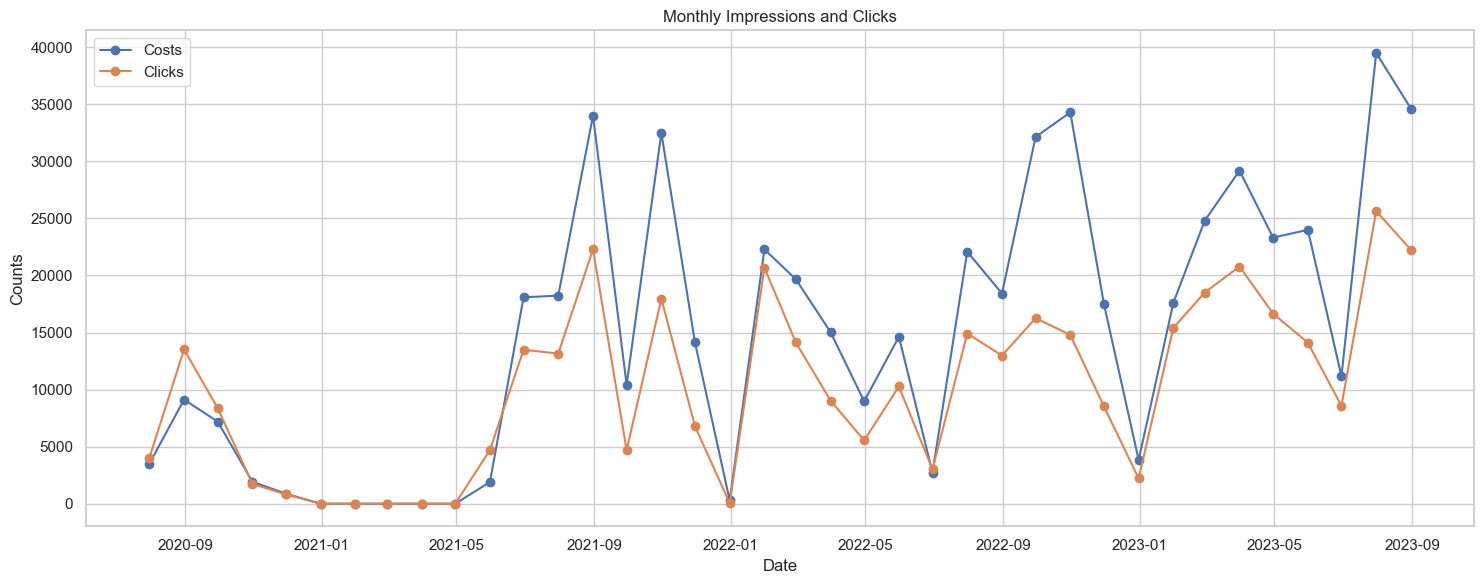

In [13]:
plt.figure(figsize=(15, 6))

# Create subplots in a 1x1 grid
plt.subplot(1, 1, 1)

# Plot the 'impressions' and 'clicks' columns
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_costs'], marker='o', label='Costs')
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_clicks'], marker='o', label='Clicks')

# Set plot title and labels
plt.title('Monthly Impressions and Clicks')
plt.xlabel('Date')
plt.ylabel('Counts')

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
type(ax.get_legend_handles_labels())

tuple

[<matplotlib.lines.Line2D object at 0x1327aa860>, <matplotlib.lines.Line2D object at 0x131e54b80>, <matplotlib.lines.Line2D object at 0x1334050c0>]
['Costs', 'Clicks', 'Impressions']


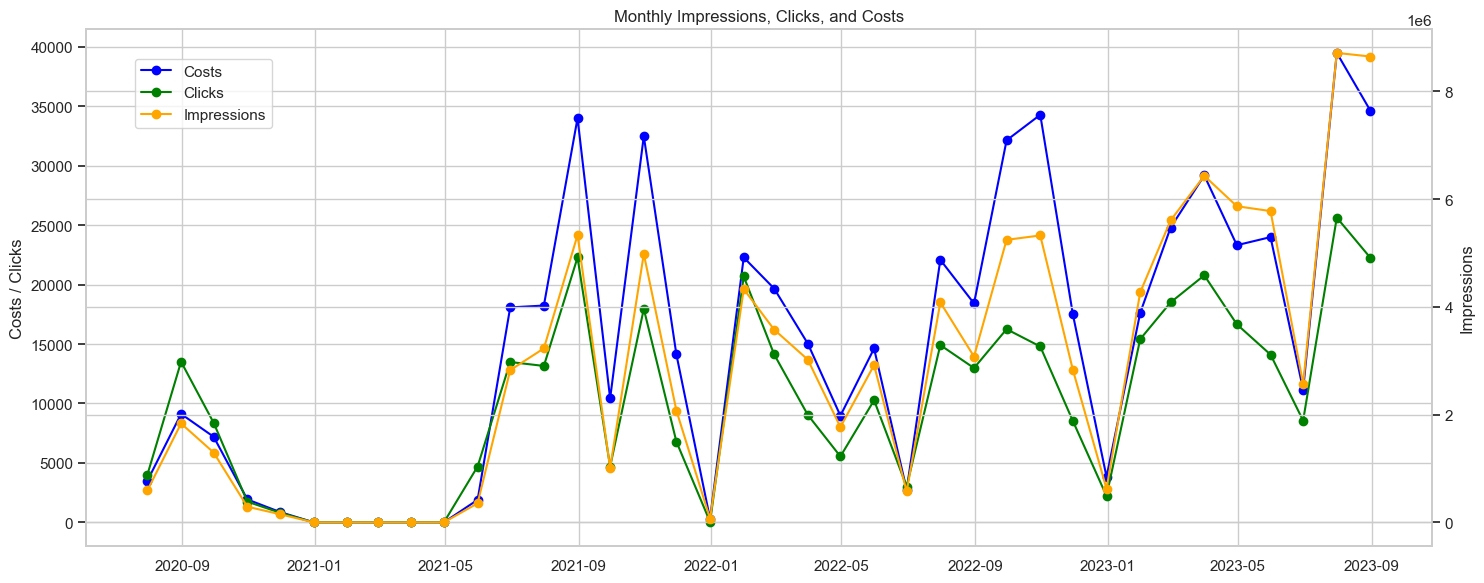

In [50]:
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(fb_data_monthly.index, fb_data_monthly['fb_costs'], marker='o', color='blue', label='Costs')

plt.plot(fb_data_monthly.index, fb_data_monthly['fb_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(fb_data_monthly.index, fb_data_monthly['fb_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()







# Google

# Tiktok

# DF

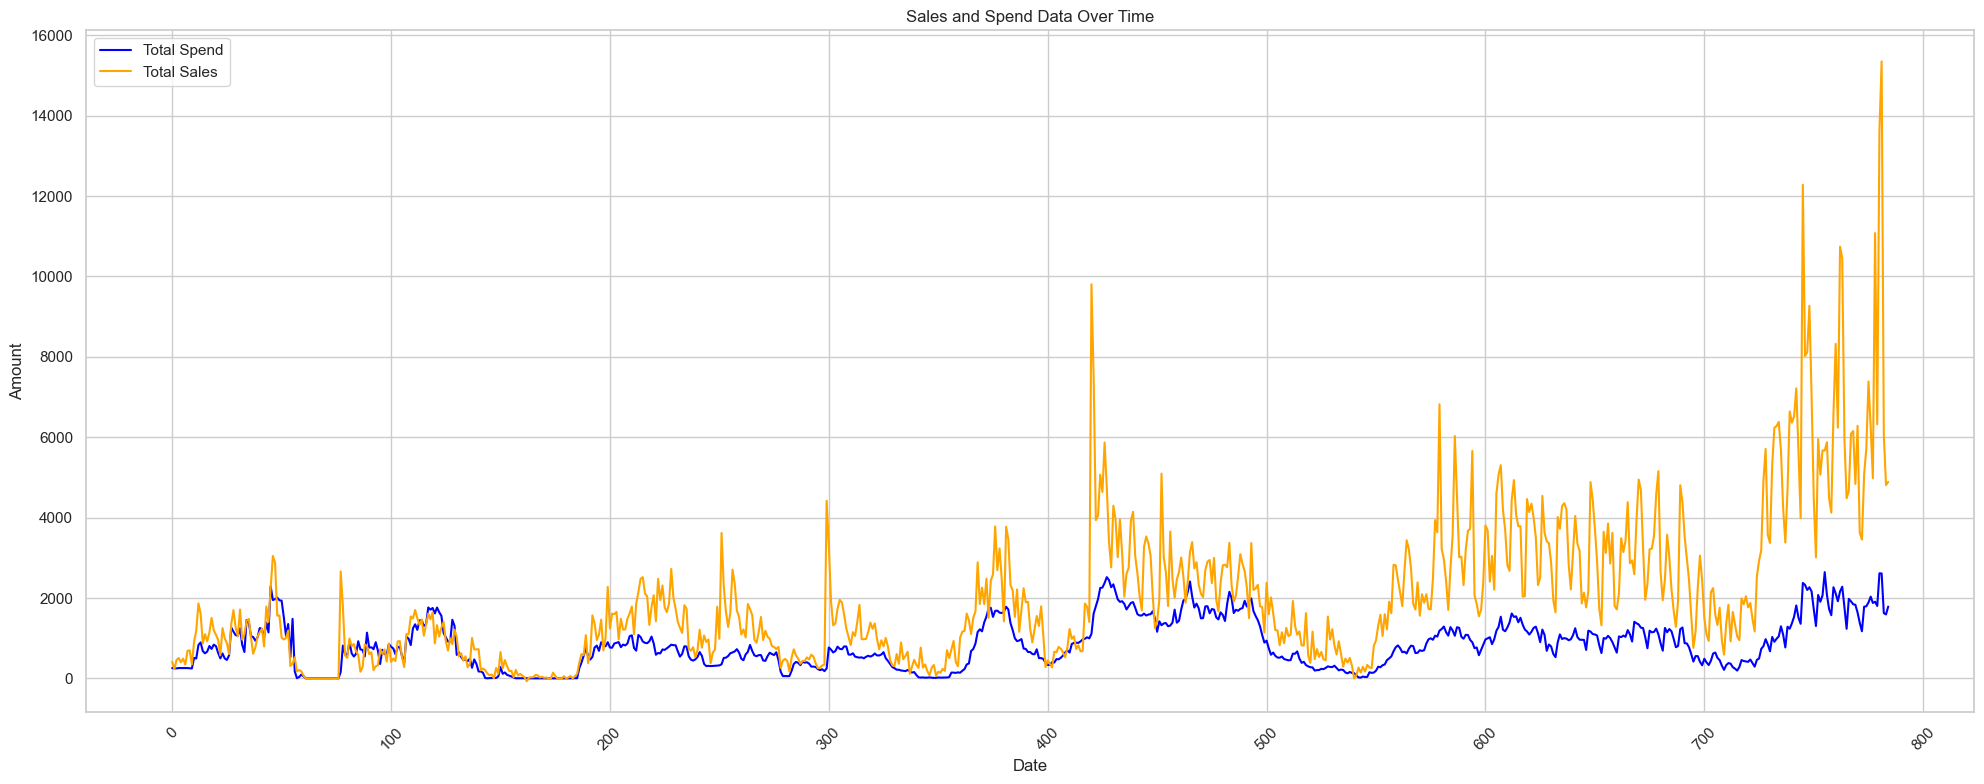

In [3]:
plt.figure(figsize=(20, 8)) 
sns.set(style="whitegrid")

plt.plot(df.index, df['Total_Spend'], linestyle='-', color='blue', label='Total Spend') 
plt.plot(df.index, df['total_sales'], linestyle='-', color='orange', label='Total Sales') 

plt.title('Sales and Spend Data Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.xticks(rotation=45)
plt.legend()  # Adding legend

plt.tight_layout()
plt.show()

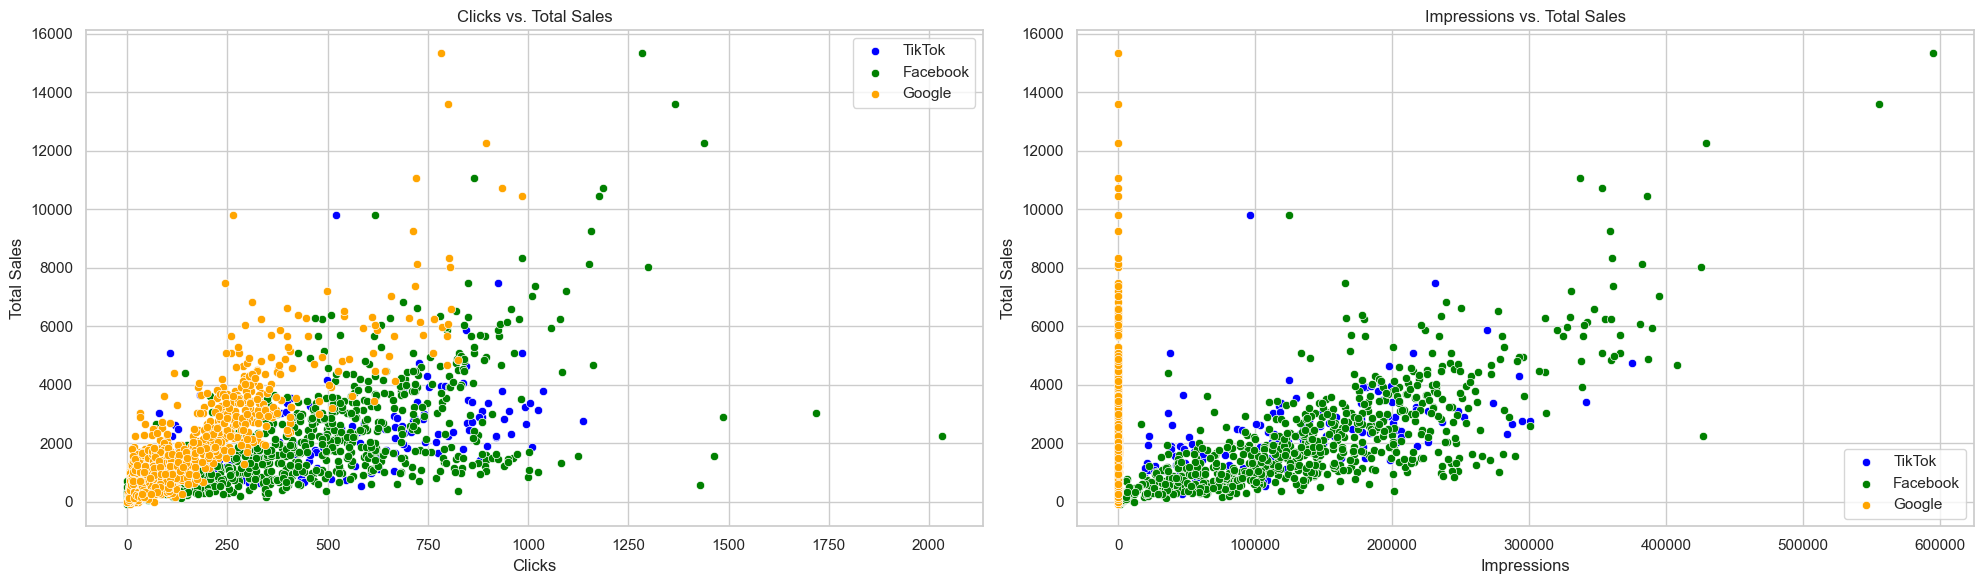

In [56]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_clicks', y='total_sales', data=df_nan, label='TikTok', color='blue')
sns.scatterplot(x='fb_clicks', y='total_sales', data=df_nan, label='Facebook', color='green')
sns.scatterplot(x='google_clicks', y='total_sales', data=df_nan, label='Google', color='orange')
# Set plot title and labels
plt.title('Clicks vs. Total Sales')
plt.xlabel('Clicks')
plt.ylabel('Total Sales')
# Show legend
plt.legend()


plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_impressions', y='total_sales', data=df_nan, label='TikTok', color='blue')
sns.scatterplot(x='fb_impressions', y='total_sales', data=df_nan, label='Facebook', color='green')
sns.scatterplot(x='google_impressions', y='total_sales', data=df_nan, label='Google', color='orange')
# Set plot title and labels
plt.title('Impressions vs. Total Sales')
plt.xlabel('Impressions')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()